# Telco Customer Churn

**PREPROCESSING AND EXPLORATORY DATA ANALYSIS**

IBM Sample Data Set for predicting behaviour to retain customers. We will analyze all relevant customer data and developed focused customer retention programs. 

The dataset include information about :


* Customers who left within the last month – the column is called Churn
*  Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
*  Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
*  Demographic info about customers – gender, age range, and if they have partners and dependents








In this phase, we'll look at the data in more detail by verifying the pertinent information, looking for any missing values, and otherwise cleaning it up in preparation for the EDA process. so that it may be properly translated and visualized during the EDA process. We begin by importing the data and loading all the required packages.

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

**Overview**

In [2]:
from google.colab import  files
uploaded = files.upload()

Saving telco (1).csv to telco (1).csv


In [3]:
data = pd.read_csv('telco (1).csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data['PaymentMethod']=data['PaymentMethod'].str.replace('(automatic)', '')

In [6]:
# Change data type of Senior Citizen from integer to object because it was a categorical data
data['SeniorCitizen']=data['SeniorCitizen'].astype('object')

In [7]:
# Change data type of Total Charges from object to float
data['TotalCharges'] = data['TotalCharges'].replace(" ",0).astype(float)

**Data Preprocessing**

In [8]:
data_cat = data.dtypes[data.dtypes == 'object'].index[1:]

In [9]:
data_cat_new = [i + '_new' for i in data_cat]

In [10]:
data[data_cat_new]=data[data_cat].astype('category')

In [11]:
# Encode categorical data

for i in data_cat_new:
  encode = data[i].cat.codes
  d = data[[i]]
  d['encode']=encode
  d.drop_duplicates(inplace=True)
  display(d)
  
  data[i]=encode

,gender_new,encode
0,Female,0
1,Male,1


,SeniorCitizen_new,encode
0,0,0
20,1,1


,Partner_new,encode
0,Yes,1
1,No,0


,Dependents_new,encode
0,No,0
6,Yes,1


,PhoneService_new,encode
0,No,0
1,Yes,1


,MultipleLines_new,encode
0,No phone service,1
1,No,0
5,Yes,2


,InternetService_new,encode
0,DSL,0
4,Fiber optic,1
11,No,2


,OnlineSecurity_new,encode
0,No,0
1,Yes,2
11,No internet service,1


,OnlineBackup_new,encode
0,Yes,2
1,No,0
11,No internet service,1


,DeviceProtection_new,encode
0,No,0
1,Yes,2
11,No internet service,1


,TechSupport_new,encode
0,No,0
3,Yes,2
11,No internet service,1


,StreamingTV_new,encode
0,No,0
5,Yes,2
11,No internet service,1


,StreamingMovies_new,encode
0,No,0
5,Yes,2
11,No internet service,1


,Contract_new,encode
0,Month-to-month,0
1,One year,1
11,Two year,2


,PaperlessBilling_new,encode
0,Yes,1
1,No,0


,PaymentMethod_new,encode
0,Electronic check,2
1,Mailed check,3
3,Bank transfer (),0
6,Credit card (),1


,Churn_new,encode
0,No,0
2,Yes,1


**Exploratory Data Analysis**

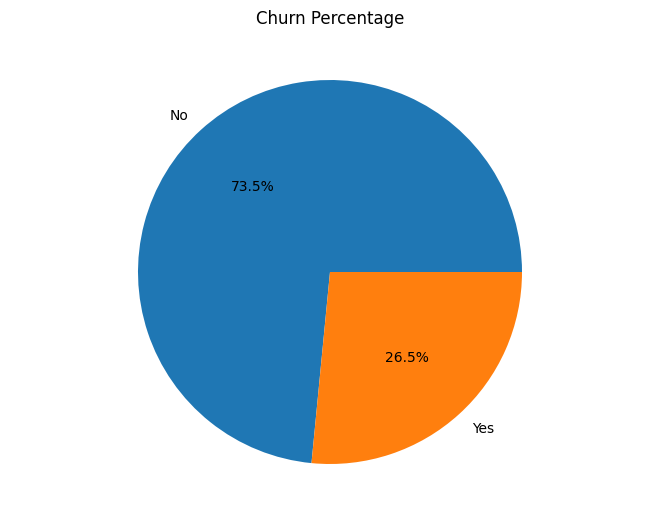

In [12]:
# Visualizing Churn Percentation

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title("Churn Percentage")
ax.axis('equal')
labels = ['No', 'Yes']
churn = data.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%1.1f%%')
plt.show()

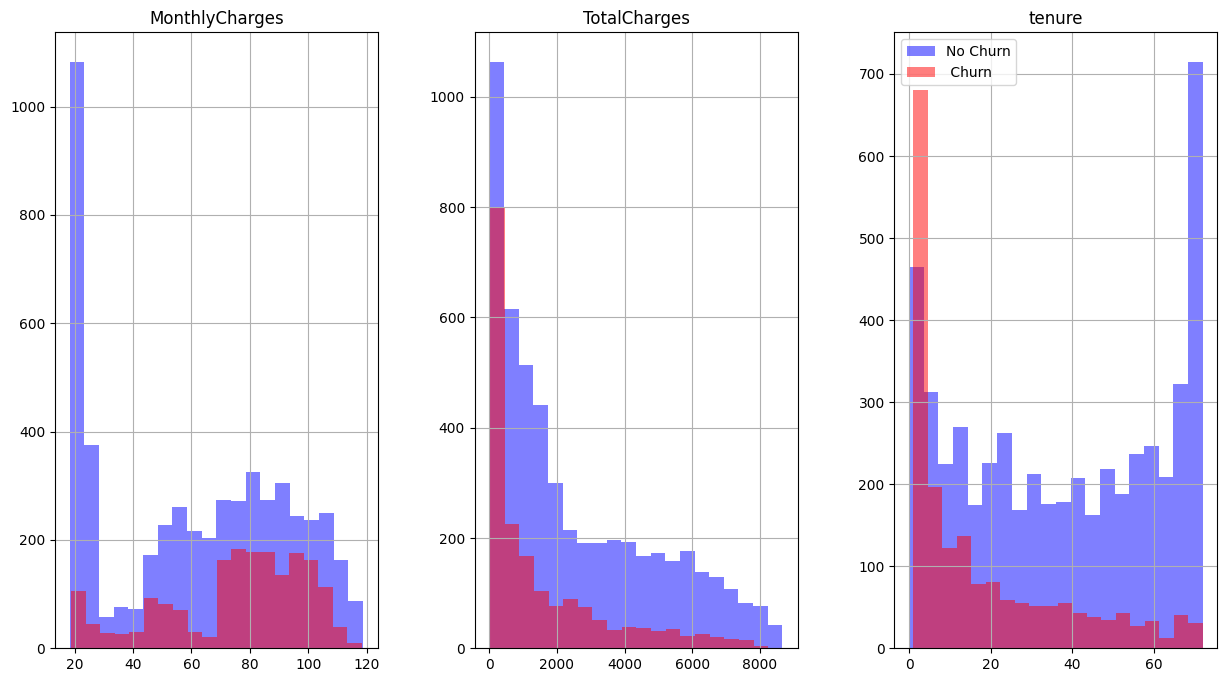

In [13]:
# Exploratory Data Analysis for Numerical Variabel

#creating bin in chart
numerical_features = ['MonthlyCharges', 'TotalCharges', 'tenure']
fig, ax = plt.subplots(1,3,figsize=(15,8))
#plot two overlays of histogram per each numerical_features
data[data.Churn=='No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
data[data.Churn=='Yes'][numerical_features].hist(bins=20, color='red', alpha=0.5, ax=ax)
plt.legend(['No Churn', ' Churn'])
plt.show()

Insights :

*  It can be seen that for Monthly Charges there is a tendency that the smaller the monthly fee charged the smaller the tendency to churn.
*  There is no trend on Total Charges
*  For tenure, there is a tendency that the longer a customer subscribes, the less likely it is to churn

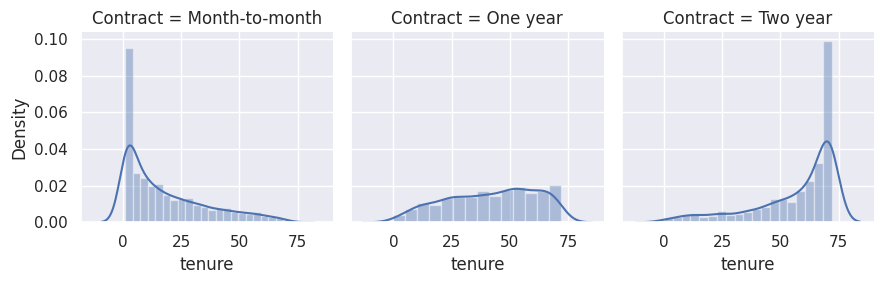

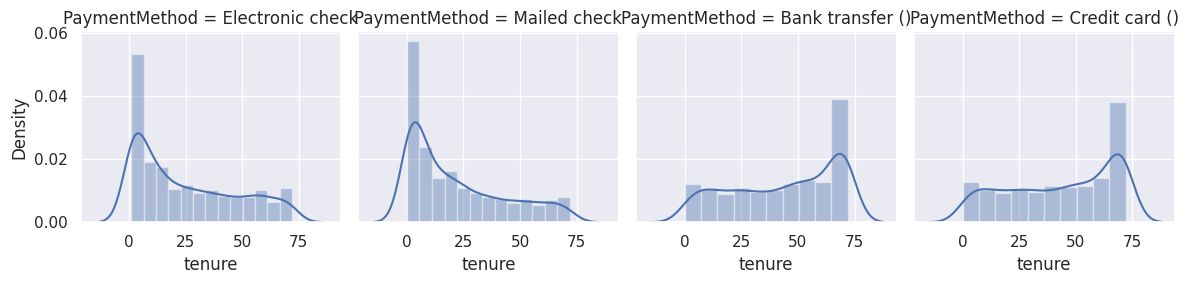

In [16]:
for col in ('Contract', 'PaymentMethod'):
    sns.FacetGrid(data, col = col).map(sns.distplot, 'tenure')

We can also see that the most of customer who have Month to Month contract have their charges spread out, the same as goes on One year contract. But it contrary with customer using Two years contract.

Customer who using Electronic and Mailed check payment method tend to be a new customer, it indicated by their small tenure. On the other hand, customer that using Bank Transfer and Credit Card is tend to be the loyal one because it seen by the pattern of a bigger tenure.

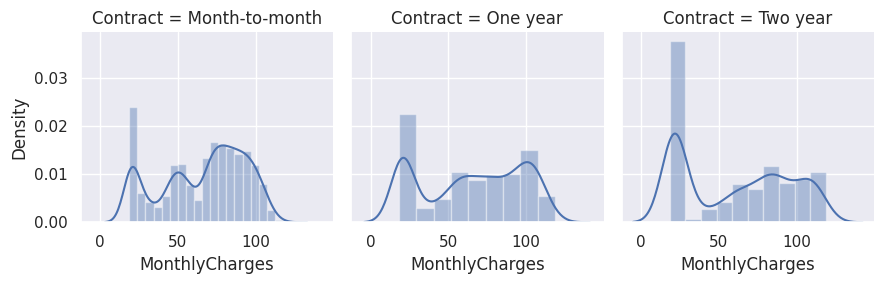

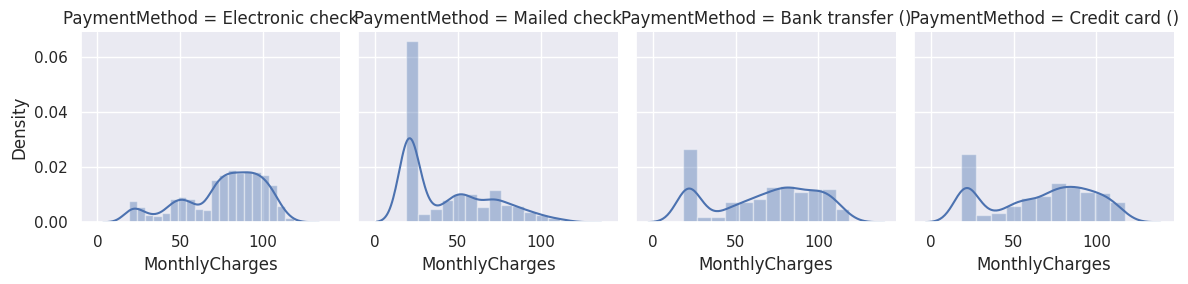

In [17]:
for col in ('Contract', 'PaymentMethod'):
    sns.FacetGrid(data, col = col).map(sns.distplot, 'MonthlyCharges')

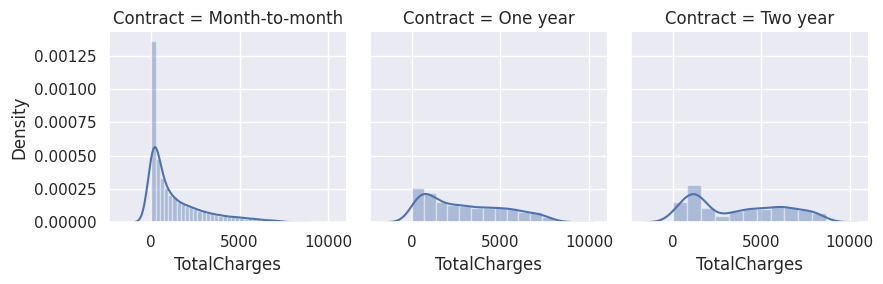

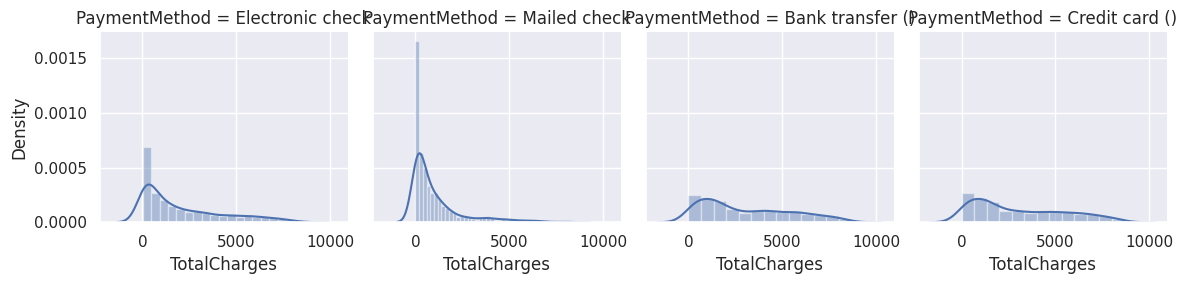

In [18]:
for col in ('Contract', 'PaymentMethod'):
    sns.FacetGrid(data, col = col).map(sns.distplot, 'TotalCharges')

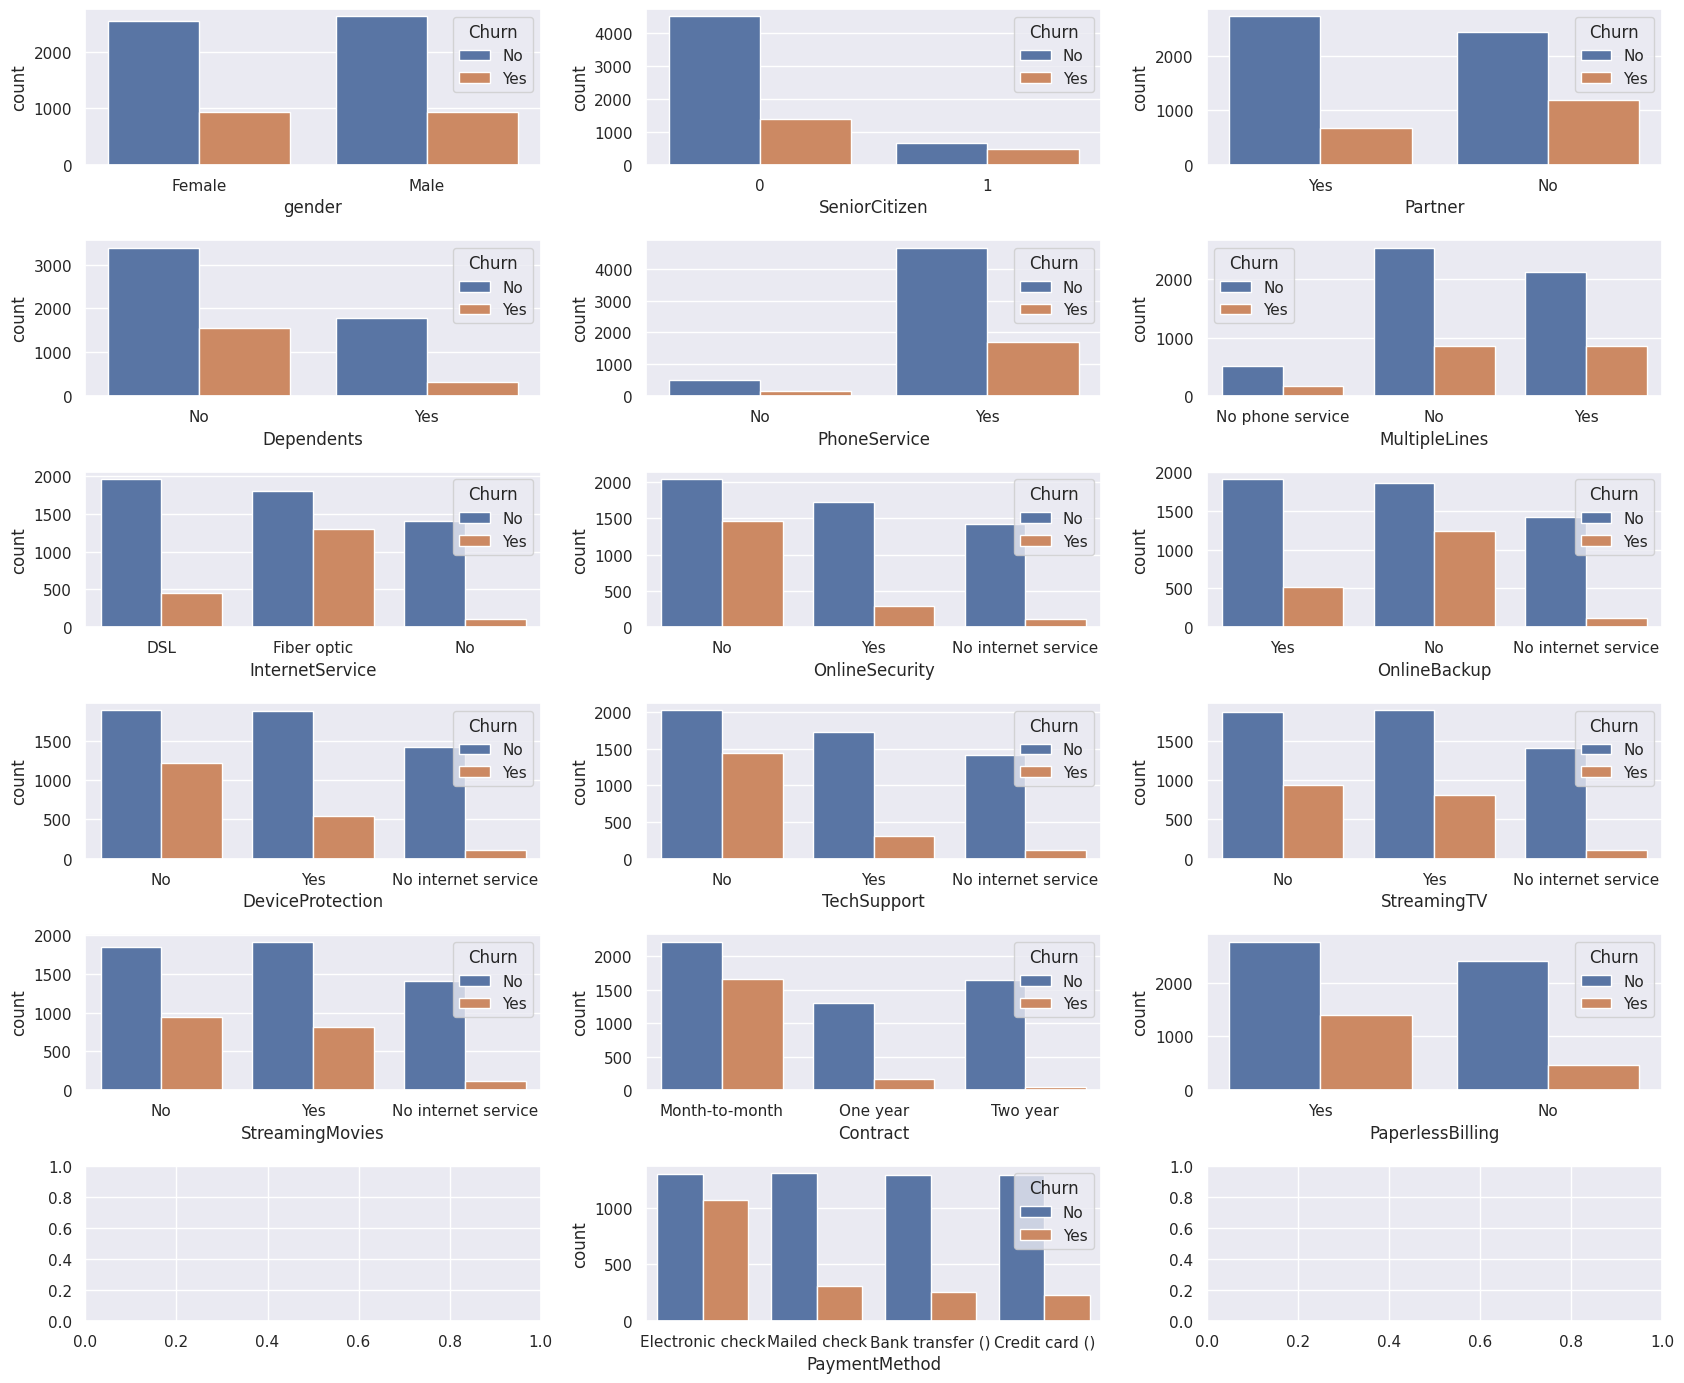

In [14]:
# Exploratory Data Analysis for Categorical Variabel

sns.set(style='darkgrid')
fig, ax = plt.subplots(6, 3, figsize=(17,14))
sns.countplot(data=data, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=data, x='SeniorCitizen', hue='Churn', ax=ax[0][1])
sns.countplot(data=data, x='Partner', hue='Churn', ax=ax[0][2])
sns.countplot(data=data, x='Dependents', hue='Churn', ax=ax[1][0])
sns.countplot(data=data, x='PhoneService', hue='Churn', ax=ax[1][1])
sns.countplot(data=data, x='MultipleLines', hue='Churn', ax=ax[1][2])
sns.countplot(data=data, x='InternetService', hue='Churn', ax=ax[2][0])
sns.countplot(data=data, x='OnlineSecurity', hue='Churn', ax=ax[2][1])
sns.countplot(data=data, x='OnlineBackup', hue='Churn', ax=ax[2][2])
sns.countplot(data=data, x='DeviceProtection', hue='Churn', ax=ax[3][0])
sns.countplot(data=data, x='TechSupport', hue='Churn', ax=ax[3][1])
sns.countplot(data=data, x='StreamingTV', hue='Churn', ax=ax[3][2])
sns.countplot(data=data, x='StreamingMovies', hue='Churn', ax=ax[4][0])
sns.countplot(data=data, x='Contract', hue='Churn', ax=ax[4][1])
sns.countplot(data=data, x='PaperlessBilling', hue='Churn', ax=ax[4][2])
sns.countplot(data=data, x='PaymentMethod', hue='Churn', ax=ax[5][1])
plt.tight_layout()
plt.show()

We can infer that Gender, Phone Service and Multiple Lines appears not having clear difference of Churn as they are having no significant difference between their churn and not churn customer.

But the other features seems that could be possible to help Machine Learning algorithm predict churn customer. The features need to be checked as they're having churn customer value higher probably the Fiber Optic Internet Service, using no Online Security, no Online backup, no Tech Support, and of course Month to Month Contract and using Electronic Check Payment Method.

Insights :

*   Fiber Optics users most likely to churn
*  25% of streaming TV  and movies client churn
*   25% of paperless billing clients churn compared to 10% in paper billing
*   45% clients with electonic check are more likely to churn compared to other check



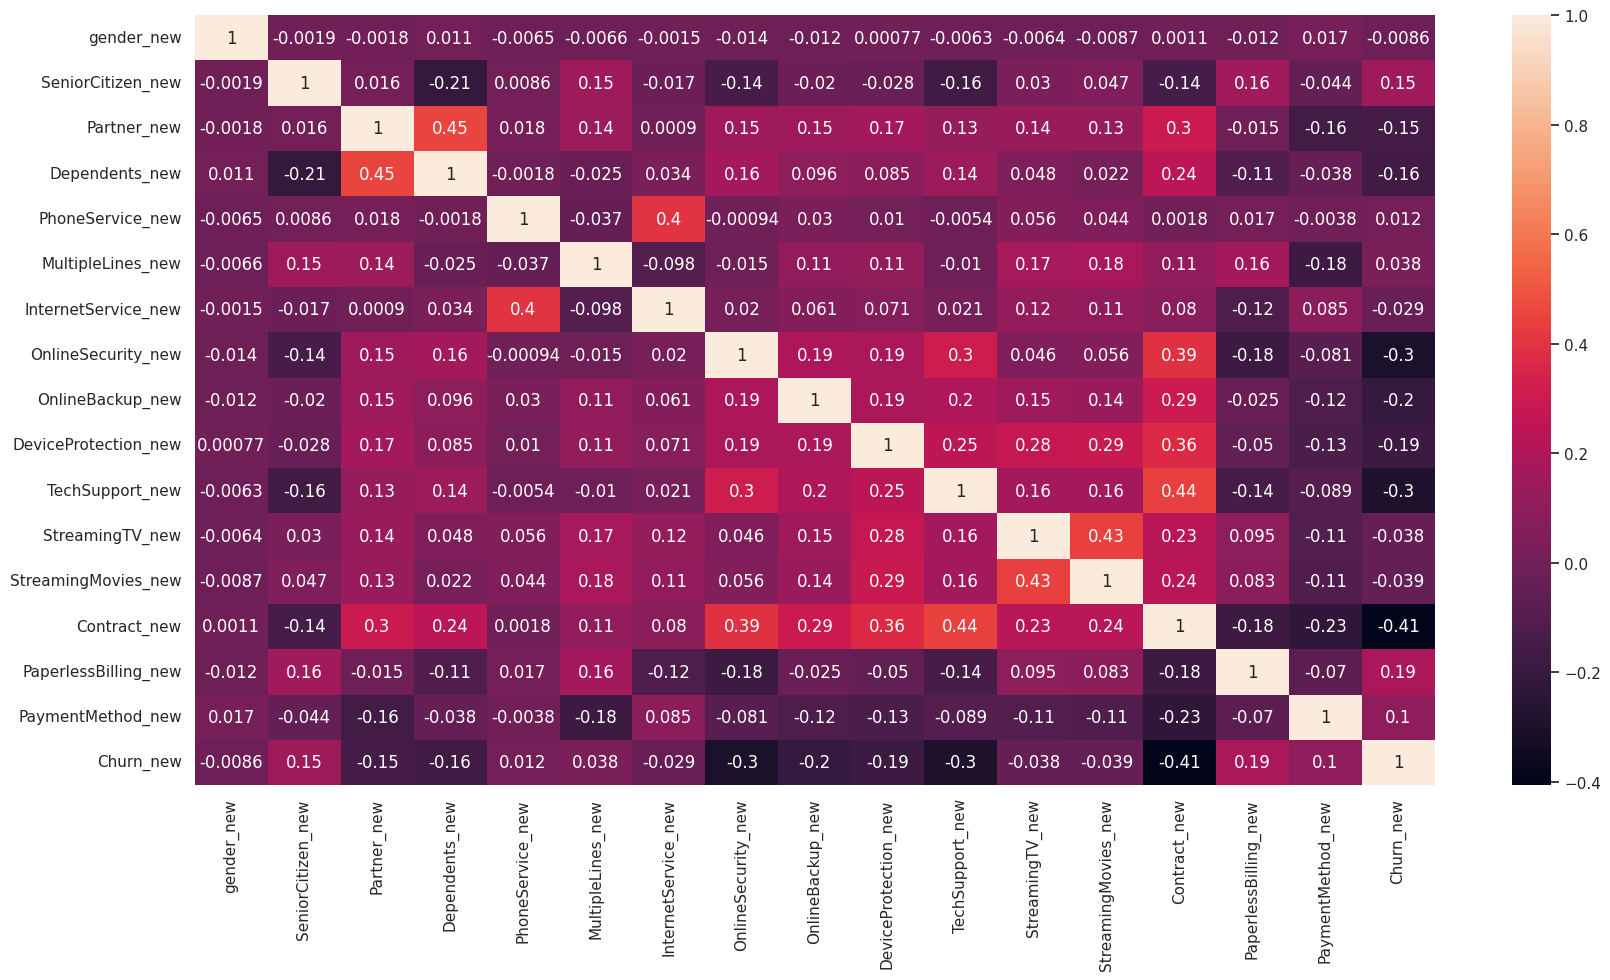

In [15]:
# Correlation of Data

plt.figure(figsize=(20,10))
sns.heatmap(data[data_cat_new].corr("spearman"), annot = True)
plt.show()

Correlation Checking :

If we look at the correlation between churn and other features, there are  16 features that have a relationship with churn. Paperless Billing feature has a weak correlation value with connection to churn, but if we compared to other features, paperless billing is the feature that has the highest correlation with churn.


**Summary**

After analyzing exploratory data telco customer churn, the following conclusions are obtained:


*   The percentage of churn customer is about 27% and from some study, we can see that Good Balance of Churn is about 31%. So we can say that the churn is not that bad.
* Atrtributes as Tenure, Contract, Paperless Billing, Monthly Charges and Internet Services are the main role in customer churn as they contributed a significant amount of Churn category.
*   There would appear to be no relationship between a customer's demographic status—including gender, senior citizen status, partner status, and dependency status—and the target (churn). Because there is no pattern and the results are most likely same whether there is churn or not.
*   Customers with service plans with month-to-month commitments are more likely to leave; additionally, customers with paperless billing, who pay with electronic checks, and who have less than 20 months left on their contracts are also more likely to leave.
*  There would appear to be no relationship between a customer's demographic status and the target (churn), which includes factors like gender, senior citizen status, partner status, and dependency status. Since there is likely no difference in the outcome between churning and not, there is no pattern.


**Measure for reducing customer churn**

For the tenure of 1 - 6 months, it needs to focus extensively on OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport as this period is the most critical and uncertain for the customers. From entry time, companies must provide affordable services to create loyal customers. They must lower the churn tenure of 40 - 50 months for these services.

